### Characters

In [1]:
import re
from collections import defaultdict
from itertools import combinations
import networkx as nx
from operator import itemgetter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('blue_bird.txt') as file:
    bird = file.read()
    
text = bird[bird.find("_The Wood-cutter's Cottage"):]

In [3]:
chars = set(re.findall(r"^([A-Z -]+)(?: \(.*\))?$", text, re.MULTILINE))

bad = {'ACT II',
 'ACT III',
 'ACT IV',
 'ACT V',
 'ACT VI', 'CAT',  'TREE', 'WISPS', 'SCENE',
 'SCENE I', 'OF THE NIGHT', 'SATISFIED VANITY', 'THE', 'ENTER', 'CURTAIN',
 'CYPRESS', 'LUXURIES',  'TYLO', 'DOG', 'FAIRY', 'HORSE', 'LAUGHTER',
 'TYLETTE', "NEIGHBOUR BERLINGOT'S LITTLE DAUGHTER",'THE-WISPS', 'COLD-IN-THE-HEAD', 
 "TYLTYL'S BROTHERS AND SISTERS"}

characters = chars - bad

In [4]:
characters

{'A CHILD',
 'A FIFTH CHILD',
 'A FOURTH CHILD',
 'A THIRD CHILD',
 'ALL',
 'ALL THE TREES AND ANIMALS',
 'ANOTHER BLUE CHILD',
 'ANOTHER CHILD',
 'BLUE CHILDREN',
 'BREAD',
 'DADDY TYL',
 'FIRE',
 'GAFFER TYL',
 'GRANNY TYL',
 'LIGHT',
 'MATERNAL LOVE',
 'MILK',
 'MUMMY TYL',
 'MYTYL',
 'NIGHT',
 'ONE OF THE CHILDREN',
 'SUGAR',
 'THE ASS',
 'THE BEECH',
 'THE BIGGEST OF THE LUXURIES',
 'THE BLUE CHILDREN',
 'THE BROTHERS AND SISTERS TYL',
 'THE BULL',
 'THE CAT',
 'THE CHESTNUT-TREE',
 'THE CHILD',
 'THE CHILD WITH THE MELONS',
 'THE COCK',
 'THE COW',
 'THE CYPRESS',
 'THE DOG',
 'THE ELM',
 'THE FAIRY',
 'THE FIR-TREE',
 'THE FIRST CHILD',
 'THE HAPPINESS',
 'THE HAPPINESS OF BEING WELL',
 'THE HORSE',
 'THE IVY',
 'THE JOY OF BEING JUST',
 'THE JOY OF MATERNAL LOVE',
 'THE JOY OF SEEING WHAT IS BEAUTIFUL',
 'THE JOY OF UNDERSTANDING',
 'THE LIME-TREE',
 'THE LITTLE BLUE CHILD',
 'THE LITTLE GIRL',
 'THE LOAF',
 'THE LUXURY',
 'THE LUXURY OF BEING RICH',
 'THE NEIGHBOUR',
 'THE OAK

### Acts

In [5]:
text2 = bird[bird.find("The Blue Bird\n\n\n"):]
acts_regex = r'\nACT [VI]+\.?\n*'
acts = re.split(acts_regex, text2)[1:]

### Scenes

In [6]:
scene_regex = r'SCENE [I]*\d*\.\-+'
scenes = [list(filter(lambda x: x != '', re.split(scene_regex, act))) for act in acts]

### Collect edge weights

In [7]:
edge_weights = [defaultdict(int) for _ in range(len(acts))]

In [8]:
bad_words = {'ALL', 'ALL THE TREES AND ANIMALS', 'CURTAIN'}
comment_regex = r"\(_?[A-Z][^)]*\)\n"
speaker_regex = r"^([A-Z -]+)(?: \([^)]*\))?$"

In [9]:
for i in range(len(acts)):
    for scene in scenes[i]:
        conversations = re.split(comment_regex, scene)
        for conv in conversations:
            speaker_list = re.findall(speaker_regex, conv, re.MULTILINE)
            speaker_list = list(filter(lambda x: x not in bad_words, speaker_list))
            speakers = set(speaker_list)
            lines = len(speaker_list)
            for pair in combinations(speakers, 2):
                edge_weights[i][frozenset(pair)] += lines / len(speakers)

In [10]:
edge_weights[1]

defaultdict(int,
            {frozenset({'BREAD', 'THE LOAF'}): 5.375,
             frozenset({'THE DOG', 'THE LOAF'}): 5.375,
             frozenset({'SUGAR', 'TYLTYL'}): 3.75,
             frozenset({'FIRE', 'WATER'}): 5.375,
             frozenset({'GAFFER TYL', 'GRANNY TYL'}): 26.25,
             frozenset({'BREAD', 'FIRE'}): 5.375,
             frozenset({'FIRE', 'THE LOAF'}): 5.375,
             frozenset({'THE BROTHERS AND SISTERS TYL', 'TYLTYL'}): 3.25,
             frozenset({'FIRE', 'THE FAIRY'}): 5.375,
             frozenset({'FIRE', 'SUGAR'}): 7.041666666666667,
             frozenset({'THE CAT', 'THE LOAF'}): 5.375,
             frozenset({'BREAD', 'TYLTYL'}): 1.25,
             frozenset({'THE DOG', 'TYLTYL'}): 1.25,
             frozenset({'SUGAR', 'THE LOAF'}): 5.375,
             frozenset({'THE FAIRY', 'TYLTYL'}): 6.666666666666667,
             frozenset({'BREAD', 'THE DOG'}): 6.625,
             frozenset({'MYTYL', 'TYLTYL'}): 28.416666666666668,
             froze

### Draw graph

In [551]:
def graph_weights(graph):
    return [edge[2]['weight'] for edge in graph.edges(data=True)]

In [552]:
conv_graph = nx.Graph()

In [553]:
num_act = 0
for edge in edge_weights[num_act]:
    conv_graph.add_edge(*edge, weight=edge_weights[num_act][edge])

In [554]:
print(nx.info(conv_graph))

Name: 
Type: Graph
Number of nodes: 13
Number of edges: 39
Average degree:   6.0000


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


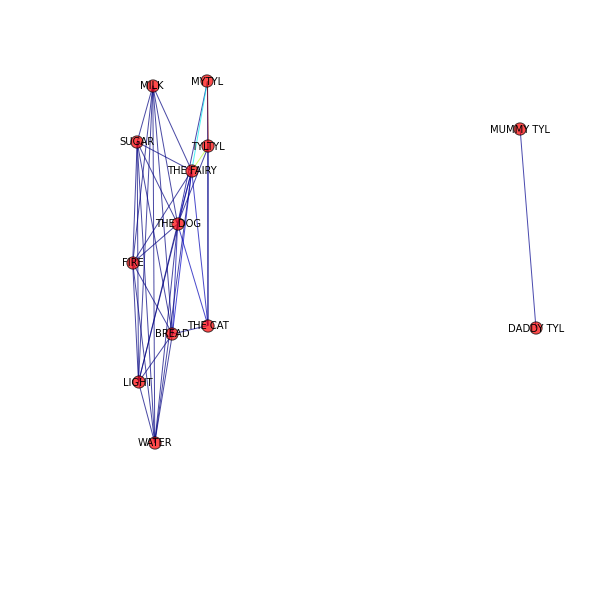

In [555]:
plt.figure(figsize=(10,10))
# plt.figure()
plt.axis('off')
# plt.axis('equal')
weights = graph_weights(conv_graph)
nx.draw_networkx(conv_graph,
                 node_size=150,
                 font_size=10,
                 with_labels=True,
                 edge_color=weights,
                 edge_cmap=plt.cm.jet,
                 edge_vmax = max(weights), edge_vmin=min(weights), alpha=0.7)
#plt.savefig('graph.svg')

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


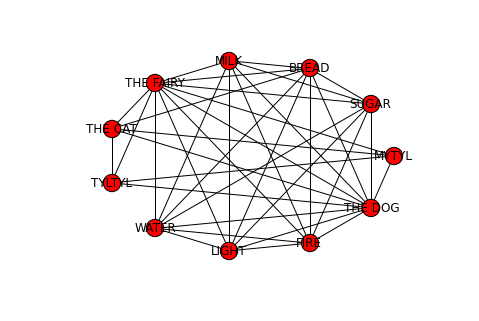

In [564]:
# nx.write_gml(conv_graph,'graph5.gml')
conv_graph.remove_nodes_from(('MUMMY TYL', 'DADDY TYL'))

nx.draw_circular(conv_graph, with_labels=True)

#### Statistics

In [566]:
print(nx.info(conv_graph))
print('-----------------')
print('Связанный граф: ', nx.is_connected(conv_graph))
# print("Для несвязанного графа нельзя посмотреть центральные узлы")
print('-----------------')
print('Центральные узлы графа: ', nx.center(conv_graph)[:5])
print('Периферийные узлы графа: ', nx.periphery(conv_graph)[:5])
print('Наибольшее кратчайшее расстояние в графе: ', nx.diameter(conv_graph))
print('Среднее кратчайшее расстояние', nx.average_shortest_path_length(conv_graph))
print('-----------------')
print('Средний кластерный коэффициент: ', nx.average_clustering(conv_graph))
print('Центральные узлы: ', [i[0] for i in sorted(nx.degree_centrality(conv_graph).items(), key=itemgetter(1), reverse=True)[:5]])
print('Срединные узлы: ', [i[0] for i in sorted(nx.betweenness_centrality(conv_graph).items(), key=itemgetter(1), reverse=True)[:5]])
print('Близкие к другим словам узлы: ', [i[0] for i in sorted(nx.closeness_centrality(conv_graph).items(), key=itemgetter(1), reverse=True)[:5]])
print("Центральность, связанная с собственными векторами: ", 
      [i[0] for i in sorted(nx.eigenvector_centrality_numpy(conv_graph).items(), key=itemgetter(1), reverse=True)[:5]])
print('Количество клик: ', nx.graph_number_of_cliques(conv_graph))
print('Размер наибольшей клики:', nx.graph_clique_number(conv_graph))
# print('Ядра:', nx.core_number(conv_graph))

Name: 
Type: Graph
Number of nodes: 11
Number of edges: 38
Average degree:   6.9091
-----------------
Связанный граф:  True
-----------------
Центральные узлы графа:  ['THE DOG', 'THE FAIRY']
Периферийные узлы графа:  ['MYTYL', 'LIGHT', 'SUGAR', 'FIRE', 'MILK']
Наибольшее кратчайшее расстояние в графе:  2
Среднее кратчайшее расстояние 1.309090909090909
-----------------
Средний кластерный коэффициент:  0.8968975468975467
Центральные узлы:  ['THE DOG', 'THE FAIRY', 'BREAD', 'LIGHT', 'SUGAR']
Срединные узлы:  ['THE DOG', 'THE FAIRY', 'BREAD', 'THE CAT', 'MYTYL']
Близкие к другим словам узлы:  ['THE DOG', 'THE FAIRY', 'BREAD', 'LIGHT', 'SUGAR']
Центральность, связанная с собственными векторами:  ['TYLTYL', 'MYTYL', 'THE FAIRY', 'THE DOG', 'THE CAT']
Количество клик:  3
Размер наибольшей клики: 8


3
['THE FAIRY', 'THE DOG', 'BREAD', 'SUGAR', 'MILK', 'LIGHT', 'WATER', 'FIRE']
[['THE FAIRY', 'THE DOG', 'MYTYL', 'THE CAT', 'TYLTYL'], ['THE FAIRY', 'THE DOG', 'BREAD', 'SUGAR', 'MILK', 'LIGHT', 'WATER', 'FIRE'], ['THE FAIRY', 'THE DOG', 'BREAD', 'THE CAT']]


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


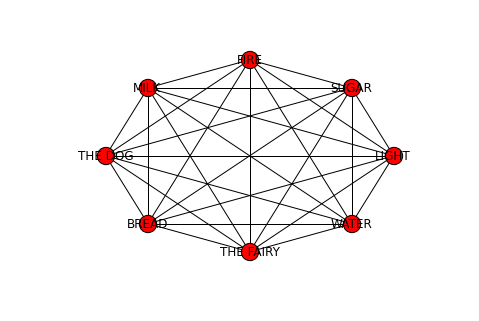

In [567]:
cl = list(nx.find_cliques(conv_graph)) 
print(len(cl))
print(max(cl, key=len))
print(cl)
Gcl = conv_graph.subgraph((max(cl, key=len)))
nx.draw_circular(Gcl, with_labels=True)